In [5]:
!pip install networkx

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
# loading the libraries

import numpy as np
import pylab as plt
import networkx as nx

In [2]:
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

In [3]:
start=0
goal=7

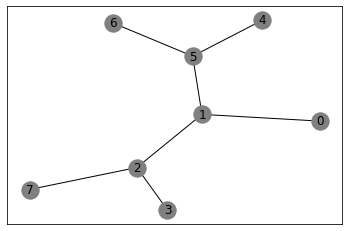

In [61]:
# constructing the graph
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos, node_color='gray')
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [8]:
# construct a matrix

MATRIX_SIZE = 8
# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [9]:
# update the rewards
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100
R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [10]:
# constructing the Q-matrix
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
Q

matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
# learning the parameters
gamma = 0.8
initial_state = 1

# get available actions
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)
available_act

array([0, 2, 5], dtype=int64)

In [14]:
R[1,]
available_act

array([0, 2, 5], dtype=int64)

In [34]:
# sample next action
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)
action

5

In [42]:
max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
max_index
test = np.where(Q[action,] == np.max(Q[action,]))
test

(array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64))

In [54]:
# learning the parameters

def update(current_state, action, gamma):

  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  print(max_index)

  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[current_state, action] = R[current_state, action] + gamma * max_value
    
  print('max_value', R[current_state, action] + gamma * max_value)

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state, action, gamma)
# max_value = Q[action, max_index]


[7]
max_value 399.99999987268535


982.7199996823801

In [55]:
current_state = np.random.randint(0, int(Q.shape[0]))
current_state

0

In [56]:
# perform the training

# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)


[7]
max_value 399.99999987268535
Score: 982.7199996823801
[5]
max_value 204.79999984085669
Score: 982.7199997127168
[2]
max_value 319.9999998981483
Score: 982.7199997420787
[7]
max_value 399.99999987268535
Score: 982.7199997420787
[2]
max_value 319.9999998981483
Score: 982.7199997714406
[1]
max_value 255.99999980107083
Score: 982.7199997714406
[2]
max_value 319.9999998981483
Score: 982.7199997714406
[2]
max_value 319.9999998981483
Score: 982.7199997714406
[2]
max_value 319.9999998981483
Score: 982.7199997714406
[5]
max_value 204.79999984085669
Score: 982.7199998017774
[7]
max_value 399.99999987268535
Score: 982.7199998017774
[2]
max_value 319.9999998981483
Score: 982.7199998017774
[7]
max_value 399.99999987268535
Score: 982.7199998017774
[7]
max_value 499.9999998408567
Score: 982.7199998097345
[2]
max_value 319.9999998981483
Score: 982.7199998097345
[1]
max_value 255.99999980107083
Score: 982.7199998097345
[1]
max_value 255.99999991851865
Score: 982.7199998332242
[1]
max_value 255.9999

max_value 255.99999999440075
Score: 982.7199999889258
[1]
max_value 255.99999999440075
Score: 982.7199999889258
[2]
max_value 319.9999999930009
Score: 982.7199999889258
[7]
max_value 399.99999999641653
Score: 982.7199999889258
[7]
max_value 399.99999999641653
Score: 982.7199999899589
[1]
max_value 255.99999999440075
Score: 982.7199999899589
[7]
max_value 399.99999999641653
Score: 982.7199999899589
[1]
max_value 255.99999999440075
Score: 982.7199999899589
[7]
max_value 499.9999999981653
Score: 982.7199999891491
[1]
max_value 255.99999999440075
Score: 982.7199999891491
[5]
max_value 204.7999999955206
Score: 982.7199999891491
[7]
max_value 499.9999999985323
Score: 982.7199999890302
[1]
max_value 255.99999999440075
Score: 982.7199999890302
[7]
max_value 399.99999999882584
Score: 982.719999989512
[7]
max_value 399.99999999882584
Score: 982.719999989994
[7]
max_value 399.99999999882584
Score: 982.719999989994
[2]
max_value 319.9999999990607
Score: 982.7199999912059
[7]
max_value 399.99999999

[[  0.    64.     0.     0.     0.     0.     0.     0.  ]
 [ 51.2    0.    80.     0.     0.    51.2    0.     0.  ]
 [  0.    64.     0.    64.     0.     0.     0.   100.  ]
 [  0.     0.    80.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.    51.2    0.     0.  ]
 [  0.    64.     0.     0.    40.96   0.    40.96   0.  ]
 [  0.     0.     0.     0.     0.    51.2    0.     0.  ]
 [  0.     0.    80.     0.     0.     0.     0.   100.  ]]


In [60]:
# perform the testing now

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)


Most efficient path:
[0, 1, 2, 7]


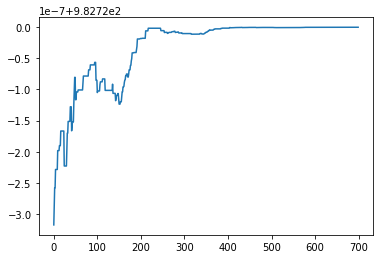

In [59]:
# plotting the scores

plt.plot(scores)
plt.show()